In [ ]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Linear regression

In [ ]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of ther regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [ ]:
lw = Table.read_table('little_women.csv').move_to_start('Periods')
lw.show(3)

In [ ]:
shotput = Table.read_table('shotput.csv')
shotput.show(3)

## Residuals

In [ ]:
lw.scatter(0, 1, fit_line=True)

In [ ]:
y = lw.column(1)
fitted = fit(lw, 0, 1)
residuals = y - fitted

In [ ]:
sum(residuals)

In [ ]:
np.mean(residuals**2)**0.5

In [ ]:
lw.with_column('residual', residuals).scatter(0, 2)

In [ ]:
def plot_residuals(t):
    t.scatter(0, 1, fit_line=True)
    y = t.column(1)
    fitted = fit(t, 0, 1)
    residuals = y - fitted
    print('Sum of residuals:', sum(residuals))
    print('RMSE:', np.mean(residuals**2)**0.5)
    t.with_column('Residual', residuals).scatter(0, 2)

In [ ]:
plot_residuals(shotput)

## Dugong

In [ ]:
dugong = Table.read_table('http://www.statsci.org/data/oz/dugongs.txt')
dugong.show(3)

In [ ]:
plot_residuals(dugong)

In [ ]:
us_women = Table.read_table('us_women.csv')
us_women.show(3)

In [ ]:
correlation(us_women, 0, 1)

In [ ]:
plot_residuals(us_women)

## Variance

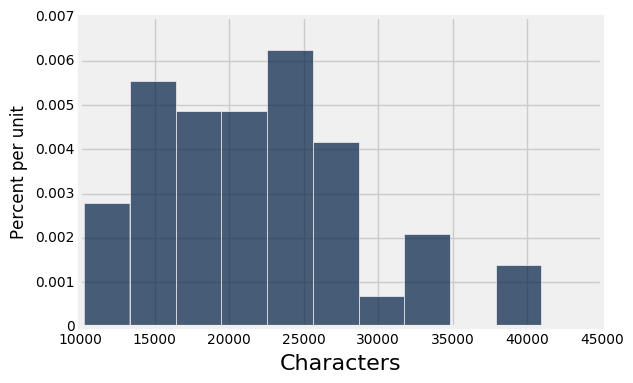

In [101]:
lw.hist(1)

In [102]:
y = lw.column(1)
fitted = fit(lw, 0, 1)
residuals = y - fitted

In [103]:
np.std(y)

7019.1759340480321

In [104]:
np.std(y) ** 2

49268830.793119065

In [105]:
np.var(y)

49268830.793119058

In [106]:
r = correlation(lw, 0, 1)
r

0.92295768958548163

In [107]:
r ** 2

0.85185089676497028

In [108]:
1 - r ** 2

0.14814910323502972

In [109]:
np.var(fitted) / np.var(y)

0.85185089676497006

In [110]:
np.var(residuals) / np.var(y)

0.1481491032350295

In [112]:
np.var(fitted) + np.var(residuals)

49268830.793119036

In [113]:
np.std(fitted) / np.std(y)

0.92295768958548141

## Regression Model

In [ ]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)

    sample.scatter(0, 1)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    sample.scatter(0, 1)
    plots.title('What We Get to See')

    sample.scatter(0, 1, fit_line=True)
    plots.title('Regression Line: Estimate of True Line')

    sample.scatter(0, 1, fit_line=True)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")
    
draw_and_compare(2, -5, 10)

In [ ]:
draw_and_compare(2, -5, 100)

In [ ]:
draw_and_compare(2, -5, 1000)